## Analysis Procedures <a id='top'>(CRISP-DM)</a>


### 1. [Business understanding](#p1)

**Ask questions we want to get the answer for, in a business perspective.**

    
### 2. [Data understanding](#p2)
**Explore below datasets by using pandas functions and visual tools.**
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day
    
### 3. [Data preparation](#p3)
**Perform data wrangling to be ready for modelling consumption.**    
    - Handle missing values and categorical values.
    - Perform data cleaning and feature engineering.

### 4. [Modelling](#p4)
    
**Use regression models to predict price of listings.**

### 5. [Results](#p5)
**Answer business questions with data and visualization methods.**

## <a id='p1'>1. Business understanding </a>

**At the end of analysis, we want to know:**

- [Can you build a price suggestor for listings? which features impact the price most?](#q1)<br>
- [What are the attributes of listings with higher review scores? ](#q2)<br>
- [How the price changes over one year? ](#q3)<br>
- [What are the busiest times of the year to visit Seattle?](#q4)<br>

## <a id='p2'>2. Data understanding </a>

### Summary of datasets
In this part, the three datasets in csv format is imported into dataframes using `pandas`, **and explored using  pandas functions in below cells.** The information obtained about the datasets is summarized in below paragrahs in this cell.

**Calender dataset** contains the price information for each listing in a calender year. There are 3818 unique `listing_id` in the dataset, and for each `listing_id` there are 365 rows of price corresponding one day between _2016-01-04 and 2017-01-02_ .<br>
The `available` column has two unique values _'t' or 'f'_ meaning _True or False_. When a listing is not available for the day, the columns `price` is _nan_.

**Listing dataset** contains the full description for each listing scraped on _2016-01-04_ , with 3818 rows describing 3818 unique listings. <br>
There are 92 columns/features in this dataset, thus a lot of information that need to be selectively used in later session. <br>
Telling from the column names, the features can be roughly divided into below categories: listing info, host info, location, room/house info, price and booking, reviews, and policies.

**Reviews dataset** contains all the review entries for above mention 3818 listings by _2016-01-03_ since 2009. Each row records the review's info and the detailed text comments for a listing in a certain day, without a numerical score feature. <br>
_The positivity of each comments could be predicted through a NLP modelling, but it's not in the objectives of this analysis and the _listing_ dataset already have features of reviews in numerical scores. <br>
This dataset can be used to estimate the occupancy_rate in the previous years.<br>
<br>
[**Back to Top**](#top)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# import datasets
calender_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/calendar.csv'
listing_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/listings.csv'
reviews_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/reviews.csv'

calender=pd.read_csv(calender_path)
listing=pd.read_csv(listing_path)
reviews=pd.read_csv(reviews_path)


### calender dataset

In [2]:
calender.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
# there are 3818 listing_ids in calender dataset
calender.listing_id.nunique()

3818

In [5]:
# each listing_id has 365 entries
calender.listing_id.value_counts().head()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
Name: listing_id, dtype: int64

In [6]:
# check date range of calender dataset
print('Date range of calender data is between {} and {}.'.format(calender.date.min(),calender.date.max()))

Date range of calender data is between 2016-01-04 and 2017-01-02.


### listing dataset

In [7]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
# comment out below to see listing info, there are 92 columns and 3818 entries
# listing.info() 

In [9]:
#comment out to check columns
# listing.columns # 92 columns

### reviews dataset

In [10]:
#check reviews dataset
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [12]:
print('Date range of review data is between {} and {}.'.format(reviews.date.min(),reviews.date.max()))

Date range of review data is between 2009-06-07 and 2016-01-03.


## <a id='p3'>3. Data preparation</a>

The _listing_ and _calender_ datasets will be processed in this section to be ready for comsumption for prediction models. <br/>
Pre-processing will include below: 
- [feature engineering](#ft)
- [data cleaning](#cl)
- [missing values imputing](#cl)
- [categorical values imputing](#cl)
<br>

[ **Back to Top** ](#top)

### Calender dataset

In [13]:
#Data cleaning
# remove dollar signs $ and , in the price feature
calender.price = calender.price.replace('[\$,\,]','', regex=True)
calender.price = pd.to_numeric(calender.price)

# modify available feature to boolean values to be meaningful, and convenient for furthur calculation.
calender.available.replace({'t':True, 'f': False}, inplace=True)
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null bool
price         934542 non-null float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 33.2+ MB


#### Make new features: `neighbourhood`,`availability`, `mean_price`

In [14]:
#Feature engineering
# One of our purposes is to see the price trends, considering neighborhoods, so I need to extract the useful 
# neighbourhood features from the listing dataset. After some checking, neighbourhood_group_cleansed feature 
# is the best one, merge this feature to the calender dataset.
neighourhood_group=listing[['id','neighbourhood_group_cleansed']].\
    rename(columns={'id':'listing_id','neighbourhood_group_cleansed':'neighbourhood'})
calender = calender.merge(neighourhood_group, how='left')

calender.sample(5)

,listing_id,date,available,price,neighbourhood
484041,6975036,2016-02-24,False,NaN,Downtown
979190,6545602,2016-09-20,True,53.0,Capitol Hill
1277787,4182732,2016-10-17,True,75.0,Delridge
806959,6249164,2016-11-08,True,42.0,Rainier Valley
42653,9387189,2016-11-12,False,NaN,Ballard


In [15]:
# caculate the yearly availability and mean_price for each listing using calender dataset

availability=calender.groupby('listing_id').available.mean().reset_index(name='availability')
mean_price=calender.groupby('listing_id').price.mean().reset_index(name='mean_price')

### Listing dataset <a id='ft'>features selection<a>

This dataset has too many(i.e. 92) features, it is known that models trained with too many features are prone to overfit and predict badly on unseen data, thus I need to select those possibly useful in answering our business questions, i.e. predicting prices and scores. Features with descriptive text values is not useful in this context
so I will exclude them all, with the exception for a few with categorical values. Also features that are likely to impact on price and review score but not much, are also discarded.

To select features, I personally examine EVERY feature here, to be more efficient I examine features by BATCH of 10.<br>
**Examing** includes but is not limited to: checking <br>
- the unique values of categorical values by `nunique` `value_counts`
- the number of missing values by `isnull`
- data distribution of numerical values by `describe`
- comparing features with similar names by `filter`
- and so on


**Below are some features that I discarded as they will provide little information on predicting prices and review scores. Accompanying the feature names are some thoughts written for readers' reference.** <br>
- _experiences_offered_ : 3055/3055 is 'none'
- _host_acceptance_rate_ : 3044/3045 is 100%
- _host_total_listings_count_ : has same info as host_listings_count
- _host_verifications_ : could be useful, by splitting list into elements then into categorical values such as 'has_email', but is not worth the effort in this case.
- _host_has_profile_pic_ : 3809/3817 True
- _square_feet_ : is 97.4% missing using #listing.square_feet.isnull().mean()
- _weekly_price_ : is 47.3% missing, it could be organized to a no_weekly_price feature, but will be discarded in this context.
- _monthly_price_ : is 60.3% missing, reason to discard is as above.
- _calendar_updated_ : values could be unified into number of days ago, but it will be discarded in this context.
- _has_availability_ : 100% True
- _availability_30_ : and it stands for how many days the room is available in the next 30 days. availability_num features follows the same logic. Listing dataset will be used to predict price and score, so these features I think are less significant. To calculate availability, calender dataset can be used instead.
- _review_scores_xx_ : features I only keep one feature: review_scores_rating as it is representive of overall experience.
- _requires_license_ : 100% False
- _require_guest_profile_picture_ : 3497/3828 False, this could be useful but considered not significant, thus is discarded.
- _require_guest_phone_verification_ : reason to discard is similar to above.
- _host_since_ feature can be used to tell the experience of the host, discarded here as I am not familiar with datetime parsing.

<font color='blue'>**After-thought**: It's still time-consuming, an alternative way is to use df.corr() after data cleaning and remove features with little correlations directly. Another way is after preprocessing using Lasso to select features.</font><br>

**Below cells are some example codes to examine the feature.**<br>

In [16]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [17]:
# Explore "score" features
scores=listing.filter(like='score')
scores.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [18]:
# check sum of 10-scale review_scores, it is not equal to the 100-scale review_scores_rating. So use the latter one.
scores['scores_sum']=listing.filter(like='score').iloc[:,1:].sum(axis=1)
scores[['review_scores_rating','scores_sum']].head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_scores_rating,scores_sum
0,95.0,59.0
1,96.0,60.0
2,97.0,60.0
3,NaN,0.0
4,92.0,56.0


In [19]:
#check numerical feature distribution
listing.reviews_per_month.describe()

count    3191.000000
mean        2.078919
std         1.822348
min         0.020000
25%         0.695000
50%         1.540000
75%         3.000000
max        12.150000
Name: reviews_per_month, dtype: float64

In [20]:
#check categorical feature distribution
listing.require_guest_profile_picture.value_counts()#.sort_index()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [21]:
# Codes for examining features by batch of 10 
listing.iloc[:,0:10].sample()
listing.iloc[:,10:20].sample()
listing.iloc[:,20:30].sample()
listing.iloc[:,30:40].sample()
listing.iloc[:,40:50].sample()
listing.iloc[:,50:60].sample()
listing.iloc[:,60:70].sample()
listing.iloc[:,70:80].sample()
listing.iloc[:,80:90].sample()
listing.iloc[:,90:100].sample()

,calculated_host_listings_count,reviews_per_month
3027,2,1.1


### Finally! I have the features I need

In [22]:
# update features and update listing dataset 
features = ['id','host_response_time','host_response_rate','host_is_superhost','host_listings_count',\
            'host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type',\
           'accommodates','bathrooms','bedrooms','beds','bed_type','amenities','security_deposit',\
            'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews',\
           'review_scores_rating','instant_bookable','cancellation_policy','reviews_per_month']

listing_cleansed=listing[features]
listing_cleansed.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,...,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,241032,within a few hours,96%,f,3.0,t,Queen Anne,t,Apartment,Entire home/apt,...,NaN,2,$5.00,1,365,207,95.0,f,moderate,4.07
1,953595,within an hour,98%,t,6.0,t,Queen Anne,t,Apartment,Entire home/apt,...,$40.00,1,$0.00,2,90,43,96.0,f,strict,1.48
2,3308979,within a few hours,67%,f,2.0,t,Queen Anne,t,House,Entire home/apt,...,$300.00,10,$25.00,4,30,20,97.0,f,strict,1.15
3,7421966,NaN,NaN,f,1.0,t,Queen Anne,t,Apartment,Entire home/apt,...,NaN,1,$0.00,1,1125,0,NaN,f,flexible,NaN
4,278830,within an hour,100%,f,2.0,t,Queen Anne,t,House,Entire home/apt,...,$125.00,6,$15.00,1,1125,38,92.0,f,strict,0.89


   ### Manufacture potentially useful new features from available data

In [23]:
# Amenities values are long strings of amenties, convert its value to number of amenties instead.
amenities=listing.amenities.str.split(',')
listing_cleansed['amenities']=amenities.apply(lambda row: len(list(row))) # get the length of amentity list

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# Add the yearly availability and mean_price caculated earlier from calender dataset to the listing dataset

listing_cleansed=listing_cleansed.merge(availability,left_on='id', right_on='listing_id').merge(mean_price)
listing_cleansed.drop(['listing_id','id'],axis=1,inplace=True)

In [25]:
listing_cleansed.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,...,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,availability,mean_price
0,within a few hours,96%,f,3.0,t,Queen Anne,t,Apartment,Entire home/apt,4,...,$5.00,1,365,207,95.0,f,moderate,4.07,0.947945,85.000000
1,within an hour,98%,t,6.0,t,Queen Anne,t,Apartment,Entire home/apt,4,...,$0.00,2,90,43,96.0,f,strict,1.48,0.797260,170.931271
2,within a few hours,67%,f,2.0,t,Queen Anne,t,House,Entire home/apt,11,...,$25.00,4,30,20,97.0,f,strict,1.15,0.602740,1301.818182
3,NaN,NaN,f,1.0,t,Queen Anne,t,Apartment,Entire home/apt,3,...,$0.00,1,1125,0,NaN,f,flexible,NaN,0.391781,100.000000
4,within an hour,100%,f,2.0,t,Queen Anne,t,House,Entire home/apt,6,...,$15.00,1,1125,38,92.0,f,strict,0.89,1.000000,462.739726


In [26]:
listing_cleansed.shape

(3818, 28)

### <a id='cl'>Data cleaning</a>
includes ...
- Remove the %, $ unit symbols from value features, convert format to numerical types.
- Convert f/t binary features values to binary features using 0/1
- Fill missing values
- Drop duplicates
- Get dummies of categorical values

In [27]:
#Remove the %, $ unit symbols from value features, convert format to numerical types.
for feature_with_symbol in ['cleaning_fee','extra_people','host_response_rate','security_deposit']:
    no_symbol = listing_cleansed[feature_with_symbol].replace('[\$,\%]','', regex=True)
    listing_cleansed[feature_with_symbol] = pd.to_numeric(no_symbol)

In [28]:
# For features having two categories only, knowing one indicates the other, thus replace them with '1'&'0', 
#no need one-hot encoding.
binary_features=['host_is_superhost','host_identity_verified', 'is_location_exact', 'instant_bookable']
listing_cleansed[binary_features]=listing_cleansed[binary_features].replace({'t':1, 'f':0})

In [29]:
#handling missing values
# target features 'mean_price' no missing values, 'review_scores_rating' has 647 missing values, later need to drop 
# rows for review_scores_rating is missing
listing_cleansed.isnull().sum()

# check 0 dulicates
listing_cleansed.duplicated().sum()

# Note for fee-related columns, Nan value is equivalent to 0, thus fill missing values with 0.
listing_cleansed[['security_deposit','cleaning_fee']]=\
    listing_cleansed[['security_deposit','cleaning_fee']].fillna(0.0)

# fill in columns with missing values by 'mode' for categorical values, and by 'mean' for numerical values
categorical_features=listing_cleansed.select_dtypes(include=['object']).columns.tolist()
numerical_features=listing_cleansed.select_dtypes(exclude=['object']).columns.tolist()

# import imputer to fill missing values
from sklearn.impute import SimpleImputer
imp_med=SimpleImputer(strategy='median')
imp_mode=SimpleImputer(strategy='most_frequent')

#impution is done 
listing_cleansed[categorical_features]=pd.DataFrame(imp_mode.fit_transform(listing_cleansed[categorical_features]))
listing_cleansed[numerical_features]=pd.DataFrame(imp_med.fit_transform(listing_cleansed[numerical_features]))

#check that dataset is ready
listing_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 28 columns):
host_response_time              3818 non-null object
host_response_rate              3818 non-null float64
host_is_superhost               3818 non-null float64
host_listings_count             3818 non-null float64
host_identity_verified          3818 non-null float64
neighbourhood_group_cleansed    3818 non-null object
is_location_exact               3818 non-null float64
property_type                   3818 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null float64
bathrooms                       3818 non-null float64
bedrooms                        3818 non-null float64
beds                            3818 non-null float64
bed_type                        3818 non-null object
amenities                       3818 non-null float64
security_deposit                3818 non-null float64
cleaning_fee                    38

In [30]:
#make a copy for review_score analysis
listing_cleansed_reviews=listing_cleansed.copy()

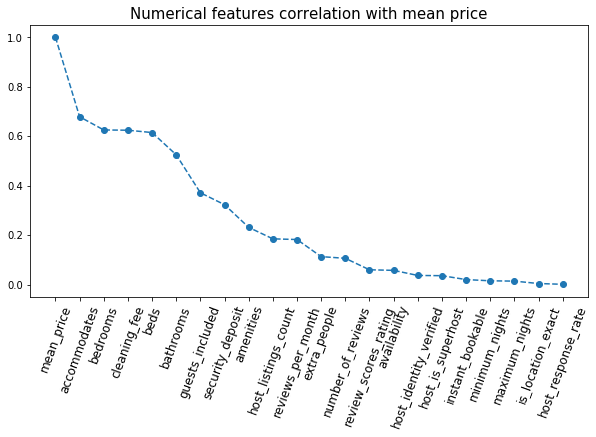

In [31]:
#Price analysis
# As time is not a feature here, use mean_price instead of price.
# now data is processed, let's check the (numerical) features' correlations with the target 'mean_price'.

price_corr=listing_cleansed.corr()[['mean_price']].apply(lambda x: abs(x)).\
    sort_values(by=['mean_price'],ascending=False)

plt.subplots(figsize=[10,5])
plt.plot(price_corr, 'o--')
plt.title('Numerical features correlation with mean price', size=15)
plt.xticks(rotation=70, size=12);

# tried removing features with low corr < 0.1, modelling score is worse. Thus keep.

In [32]:
# slope is gentle for corr value <0.1, remove these features, only keep features with corr >0.1
# numerical_features_drop=price_corr[price_corr<0.1].dropna().index.tolist()
# listing_cleansed.drop(numerical_features_drop,axis=1,inplace=True)

# numerical_features_new=price_corr[price_corr>0.1].dropna().index.tolist()
# numerical_features_new

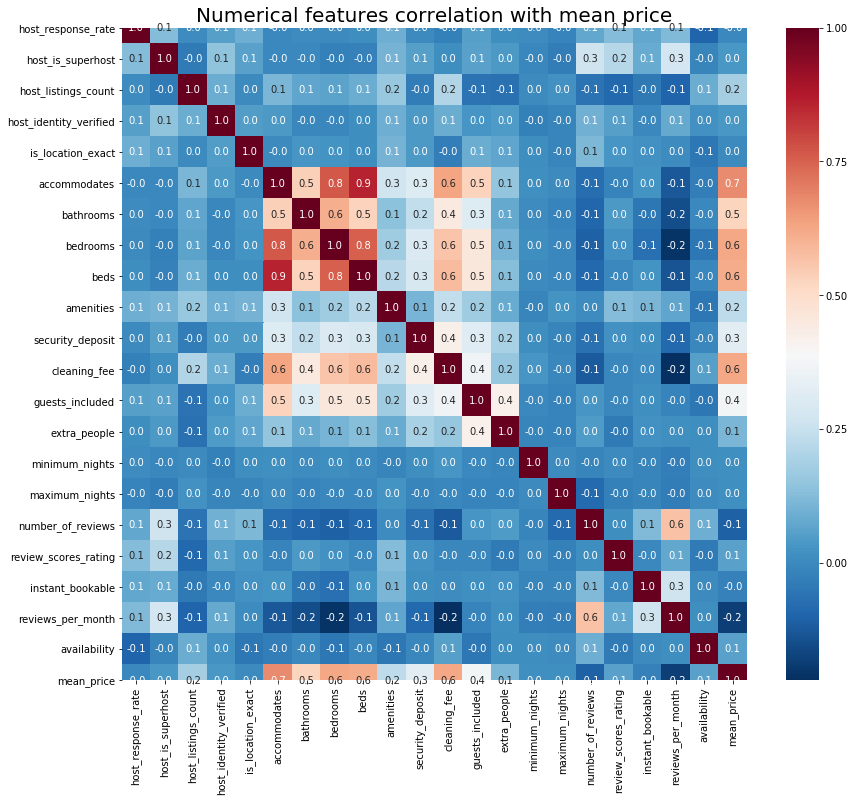

In [33]:
numerical_listing=listing_cleansed[numerical_features]
plt.subplots(figsize =(14, 12))
sns.heatmap(numerical_listing.corr(), annot=True,cmap='RdBu_r', fmt=".1f");
plt.title('Numerical features correlation with mean price',size=20);

- - - - - - - - - -  mean price vs categorical features - - - - - - - - - - 


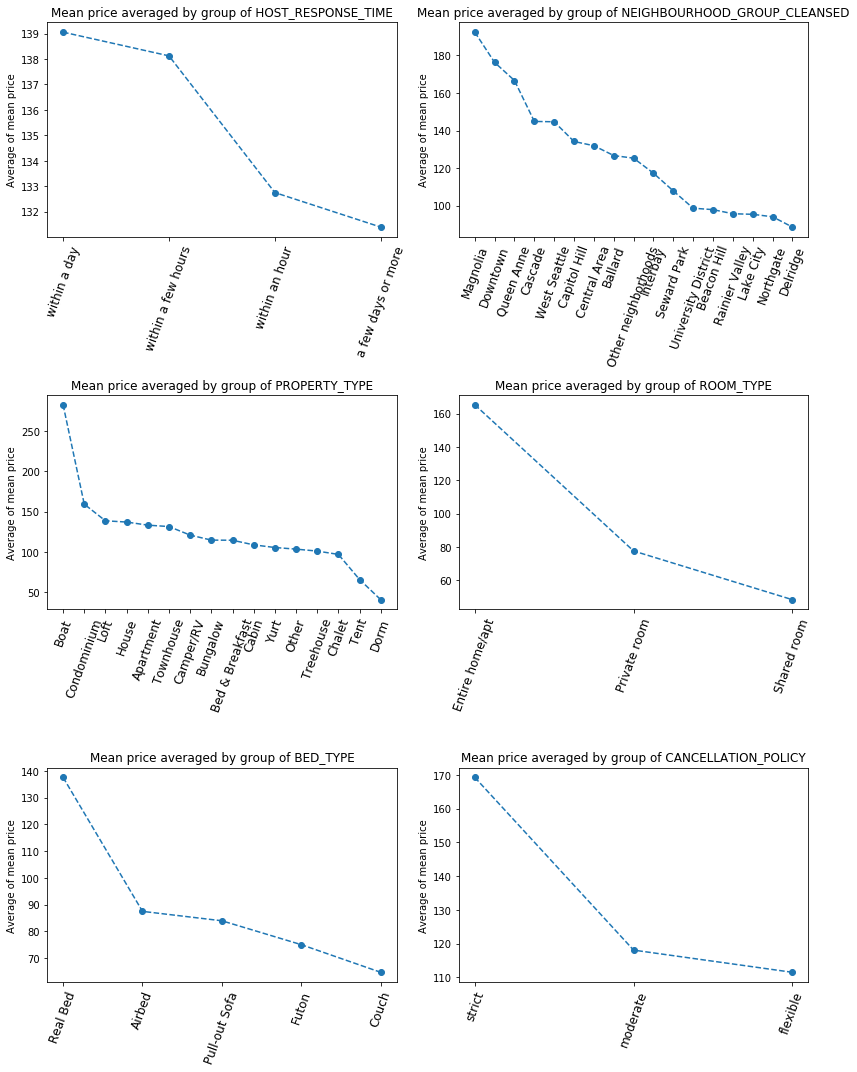

In [34]:
# check categorical features's impact on price

print('- '*10,'mean price vs categorical features','- '*10)
i=1
plt.subplots(figsize=[12,15])
for feature in categorical_features:
    corr=listing_cleansed.groupby(feature).mean_price.mean().sort_values(ascending=False)
    plt.subplot(3, 2, i)
    plt.plot(corr, 'o--')
    plt.title('Mean price averaged by group of {}'.format(feature.upper()))
    plt.ylabel('Average of mean price')
    plt.xticks(rotation=70, size=12);
    i+=1
    plt.tight_layout()
    
# Comments on output data
# 1. host_response_time NO correlation, as most active response corresponds to lowest price.
# other features ALL show great seperation of price range


# update categorical_features for precie suggester
# categorical_features_price= ['neighbourhood_group_cleansed', 'property_type',
#        'room_type', 'bed_type', 'cancellation_policy']
# listing_cleansed.drop('host_response_time',axis=1,inplace=True)

In [35]:
# one hot encode categorical values
listing_encoded=pd.get_dummies(listing_cleansed)

Text(0.5, 1, 'Categorical features correlation with mean price')

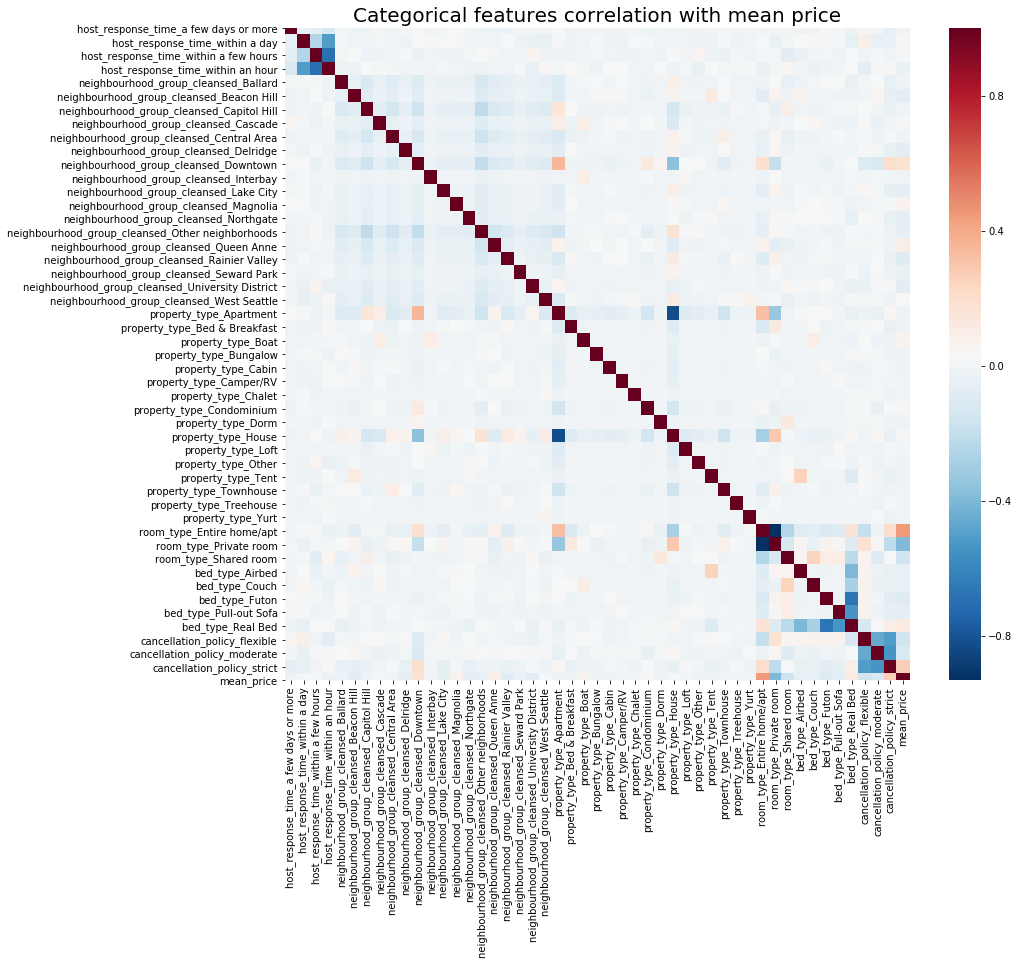

In [36]:
# we can correlation heatmap to check features correlation also

categorical_listing=listing_encoded.drop(numerical_features,axis=1)
#add 'mean_price' feature to categorical group to see correlation
categorical_listing[['mean_price']]=listing_cleansed[['mean_price']]

plt.subplots(figsize =(14, 12))
sns.heatmap(categorical_listing.corr(), annot=False,cmap='RdBu_r');
plt.title('Categorical features correlation with mean price',size=20)

## <a id='p4'>4. Modelling of price predictor</a>

In [37]:
# Prepare data for price and review score predictor

from sklearn.model_selection import train_test_split

# try Lasso as its regularization part can help to select features by limiting some feature coefficients to 0
# try Ridge as its L2 regularization can help overfitting issue
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# random forest is a good model for starters, although it is prone to overfit
from sklearn.ensemble import RandomForestRegressor

#best r2_score is 1, score 0 is for constand predictor
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler


price_data=listing_encoded.drop(['mean_price'], axis=1)
price_target=listing_encoded['mean_price'] # use mean_price to eliminate time facotr

X_train,X_test,y_train, y_test=train_test_split(price_data,price_target, train_size=0.8, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
# define function to perform repetitive model training and score calculation
def fit_predict_score(model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    '''
    Fit the given model by provided training data, predict on test data, print r2_scores for train and test datasets,
    and return the fitted model for use.
    '''
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    train_score=model.score(X_train,y_train)
    test_score=r2_score(y_preds,y_test)
#     print('For {},'.format(model))
    print('train score is : {}'.format(train_score))
    print('test score is : {}'.format(test_score))
    return model;

In [39]:
# linear regression model
lr_model=LinearRegression()
fit_predict_score(lr_model)
# same score using normalizer or standardscaler
# negative score means model is worse than a constant predictor
# it is due to overfitting with 60 features.

train score is : 0.6650942957660251
test score is : -0.0026246720636722287


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Best linear model: Ridge 

In [40]:
# try Ridge as its L2 regularization can help overfitting issue
rd_model=Ridge(alpha=1.0) # alpha values from 0.5 ~10 no impact on scores
fit_predict_score(rd_model)

train score is : 0.6650947189317648
test score is : 0.3508921822168932


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
# try Lasso model as it can reduce irrelevant features
ls_model=Lasso(alpha=0.5) # default alpha is 1.0, tried a few values found 0.5 is best
fit_predict_score(ls_model)
print('\n Coefficients of Lasso model')
print(ls_model.coef_)
# Lasso model can push cooeffients for some features to 0, through regularization

train score is : 0.6637608195908569
test score is : 0.318965236626261

 Coefficients of Lasso model
[ 0.          3.68050797  4.51224385 -0.          0.07856349 20.78486766
 16.30286678 21.38540846  1.10787744  0.          3.96241812 18.01956491
  0.74068767  0.         -0.          0.08787568 -1.09377419  4.4452502
 -1.00326685 -3.21824609  9.08851624  0.         -1.38242219 -0.
  1.58966261 -0.13229919 -1.11085026  7.87779708  3.5906615   0.1532644
 -1.12046552 16.13825369  0.82360535 -0.75682146  3.06797491 -2.66976547
 -0.26187811  8.5685027  -3.46316203 -1.78211144 -0.68356895  0.
 -0.          0.29183035  3.30494966  0.          0.71109453  2.74620772
  0.          0.87124744  0.         -0.          2.04716446 -0.36841042
  0.         -1.21918396  1.05340531  0.         11.9864282  -0.
 -6.17313316  0.87428783  0.          0.         -0.         -0.
  3.72322027 -0.36300283  0.        ]


In [42]:
# Using coefficients selected by Lasso, to get a smaller set of features
feature_selection=(ls_model.coef_!=0)
features_reduced=price_data.columns[feature_selection]
print(features_reduced)

Index(['host_is_superhost', 'host_listings_count', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
       'cleaning_fee', 'guests_included', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'reviews_per_month', 'availability', 'host_response_time_within a day',
       'host_response_time_within an hour',
       'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',

#### Optional: Rerun models using selected features from Lasso, to see if any improvements

In [43]:
#Use reduced features
X_train_r,X_test_r,y_train_r, y_test_r=train_test_split(price_data[features_reduced],price_target, \
                                                train_size=0.8, random_state=0)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
# linear regression model again
lr_model=LinearRegression()
fit_predict_score(lr_model,X_train_r,X_test_r,y_train_r, y_test_r)
#for the same model, score is much better than before

# linear regression without regularization, use features selected from Lasso, obtain score similar to Lasso.

train score is : 0.6649066942972739
test score is : 0.3496863594596634


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# try random forest again
rf_model=RandomForestRegressor(random_state=0)
fit_predict_score(rf_model,X_train_r,X_test_r,y_train_r, y_test_r)
#score still not good

train score is : 0.9397907859137068
test score is : 0.22261673818064998


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [46]:
# try Ridge gain
rd_model2=Ridge(alpha=1.0) # alpha values from 0.5 ~10 no impact on scores
fit_predict_score(rd_model2,X_train_r,X_test_r,y_train_r, y_test_r)

train score is : 0.6648143696412734
test score is : 0.3455020527345315


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
#coefficients of the regresion model can indicate the stregth of correlation between features and targets
# Combine coefficients and features into a dataframe
feature_coef=pd.DataFrame({'coef':ls_model.coef_}, index= price_data.columns)

# sort coefficients in the order of absolute values
sorted_feature_coef=feature_coef.apply(lambda x: abs(x)).sort_values(by=['coef'],ascending=False)


### Summary:
#### We are not getting better scores from linear models,  so far the best model is Ridge, with a test r2_score of 0.353. Let's visualize the results in next section.

[**Back to Top**](#top)


## <a id='p5'>5. Results: Answering business questions</a>

 [1. Can you build a price suggestor for listings? which features impact the price most?](#q1)<br>
    [2. What are the attributes of listings with higher review scores? ](#q2)<br>
    [3. How does the price change over one year? ](#q3)<br>
    [4. What are the busiest times of the year to visit Seattle?](#q4)<br>
    <br>
    [**Back to Top**](#top)

### <a id='q1'>1.</a> Can you build a price suggestor for listings? which features impact the price most?
**Now we have a machine learning model for predicting price shown as below.
These are the selected top feature, more can be explored in below cell of codes.**

In [48]:
# Display the top features correlated to listing price, the number of features shown can be modified in []
top_features=sorted_feature_coef[:12].index
feature_coef.loc[top_features]

,coef
bedrooms,21.385408
accommodates,20.784868
cleaning_fee,18.019565
bathrooms,16.302867
neighbourhood_group_cleansed_Downtown,16.138254
room_type_Entire home/apt,11.986428
availability,9.088516
neighbourhood_group_cleansed_Queen Anne,8.568503
neighbourhood_group_cleansed_Capitol Hill,7.877797
room_type_Shared room,-6.173133


train score is : 0.6650947189317648
test score is : 0.3508921822168932


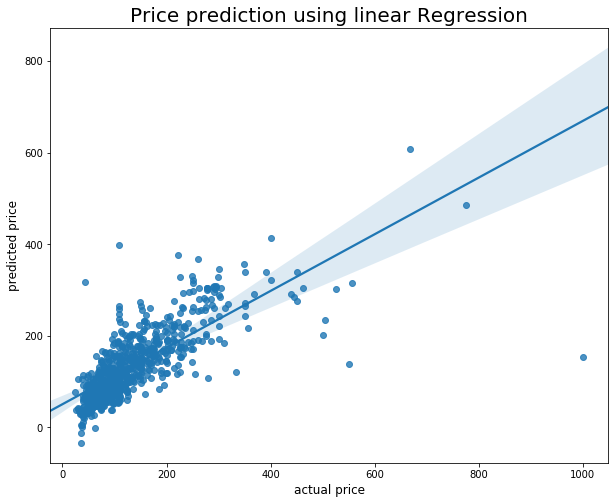

In [49]:
#Using the predictive model, plot the predicted price versus the actual price.
model=fit_predict_score(rd_model)
y_preds=model.predict(X_test)
plt.subplots(figsize =(10, 8))
sns.regplot(y_test,y_preds) 
plt.xlabel('actual price', size=12)
plt.ylabel('predicted price',size=12)
plt.title('Price prediction using linear Regression',size=20);

Words about model:
My best price predictor model using Ridge regression has a test R2 score of 0.35 (1 is max and 0 is for constant predictor, 0.3~0.5 means low correlation), which explains 35% of the price variance. Training score is 0.67, which means the model is overfitted. Although some major feature engineering has been performed,  it is still not optimal. Score should be improved by using less number of more critical features, in future I will come back and fix it.

### Conclusion:
**From above, we can see listings with below factors(in order of importance) are most likely to have a higher price:**
1. More bedrooms<br>
2. More people can be accommodated<br>
3. Need to pay for cleaning<br> 
4. In more expensive neighbourhoods: Downtown > Queen Anne > Capitol Hill<br>
5. More bathrooms (sure, if a house has more bedrooms)<br>
6. Entire home/apartment is for rent<br>
7. Availability(availability may give occupants more choice of booking dates)<br>
8. The Host has more listings in hand(this may indicates the profitibility of the location)<br>
9. Higher review score of the listing<br>


listings reviews hugely depend on how the hosts behave.
Seattle listings are the most expensive in July, so cross that month in your trip planner!
July is not Seattle's most visited time though, it's August! But apparently vistors to Capitol hill think differently, if you know why, comment in my blog okay?

[**Back to Top**](#p5)

### <a id='q2'>2.</a> What are the attributes of listings with higher review scores? 

**Higher listing review score means that the occupants had enjoyed their stay here, for which the host can ask for a better price. Also it is likely to attract more orders in the long term. So the hosts better take notes of below insights.<br>**


In [50]:
# check the (numerical) features' correlations with the  'review_scores_rating'.
abs_review_corr=listing_cleansed_reviews.corr()[['review_scores_rating']].apply(lambda x: abs(x)).\
    sort_values(by=['review_scores_rating'],ascending=False)

# top 5 correlated numerical features, only show 5 because correlation index is low ~0.1 for top 5 already.
listing_cleansed_reviews.corr()[['review_scores_rating']].loc[abs_review_corr[:5].index]


,review_scores_rating
review_scores_rating,1.000000
host_is_superhost,0.214282
host_response_rate,0.126267
amenities,0.126150
host_listings_count,-0.087018


- - - - - - - - - -  review_scores_rating vs categorical features - - - - - - - - - - 


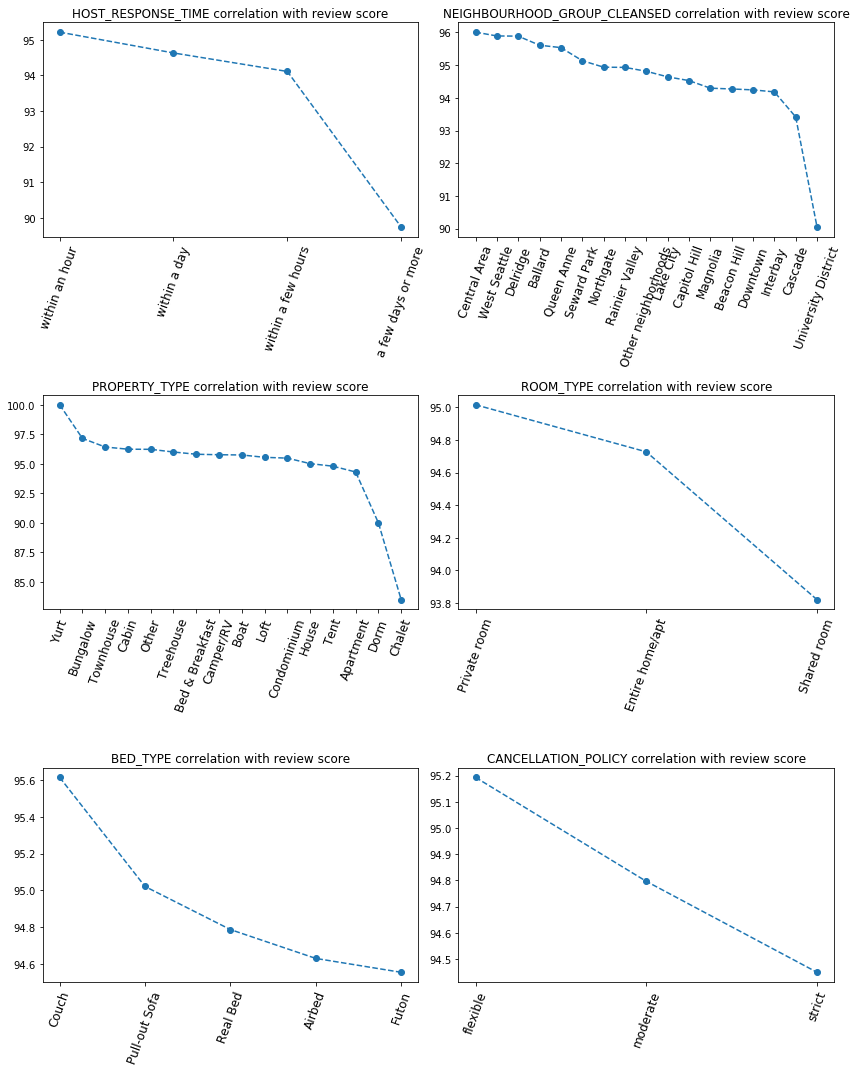

In [51]:
# check categorical features's impact on review scores

print('- '*10,'review_scores_rating vs categorical features','- '*10)
i=1
plt.subplots(figsize=[12,15])
for feature in categorical_features:
    corr=listing_cleansed_reviews.groupby(feature).review_scores_rating.mean().sort_values(ascending=False)
    plt.subplot(3, 2, i)
    plt.plot(corr, 'o--')
    plt.title('{} correlation with review score'.format(feature.upper()))
    plt.xticks(rotation=70, size=12);
    i+=1
    plt.tight_layout()
    

### Conclusion:
**From above, it is gathered that listings with below qualities tend to have better review scores:**<br>
1. Host is certified as Airbnb superhost (which means more experience, better service etc. by Airbnb's standards)
2. Host is more responsive (higher response rate and less response time)
3. There are more amenities(fridge, parking, aircon etc, you name it) in the house
4. Listing is in central area
5. Certain property types, such as a YURT!
6. Private room type
7. Flexible cancellation policy<br>

**In other words, to make the guests enjoy their time staying here, the hosts please try to avoid below:**<br>
1. Response in a few days or more(do you want to rent the house or not?)
2. Univesity district(bad choice...)
3. Certain property types, which includes: dorm and chalets
4. Shared room type
5. Stric cancellation policy

[**Back to Top**](#p5)

### <a id='q3'>3.</a> How does the price change over one year?

Using calender dataset, check how the listing price trends along a year in Seattle.

In [52]:
# let's get back to the calender data, and some processing is also needed.
# add month feature from date column
calender['month']=calender.date.str.split('-').apply(lambda x: '-'.join(x[:2]))
calender_month=calender.groupby(['neighbourhood','month']).price.mean().reset_index()

#create pivot table to analyse price by month and neighbourhood
calender_pivot=calender_month.pivot(index='month', columns='neighbourhood',values='price').filter(like='2016',axis=0)
calender_pivot.head()

neighbourhood,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
month,,,,,,,,,,,,,,,,,
2016-01,106.819085,97.434985,122.861884,138.879121,118.986304,76.674208,151.918734,116.937255,88.261600,185.880632,87.189873,108.516816,154.538746,89.400886,98.864041,94.003820,139.990405
2016-02,110.033227,96.401518,125.381330,144.141864,122.093812,81.613109,156.857117,112.874126,92.184322,185.428373,88.005780,113.688757,153.775233,89.511774,97.792434,96.716808,136.937485
2016-03,113.237420,94.018613,129.379577,146.517104,123.147360,87.960275,173.549728,119.141935,91.227027,190.361674,89.282902,114.391564,163.659001,93.054608,97.588752,98.777852,137.891341
2016-04,120.999350,99.030576,134.181818,157.135593,128.884648,89.799889,182.228800,116.575646,92.973451,204.425329,91.769274,121.214977,170.429821,100.901802,105.656733,106.583080,145.114359
2016-05,122.753247,102.737389,135.511436,168.933374,134.314932,91.482906,196.796751,116.682310,96.041793,200.872061,96.053719,124.448971,177.208201,103.639314,106.018085,108.026615,146.612736


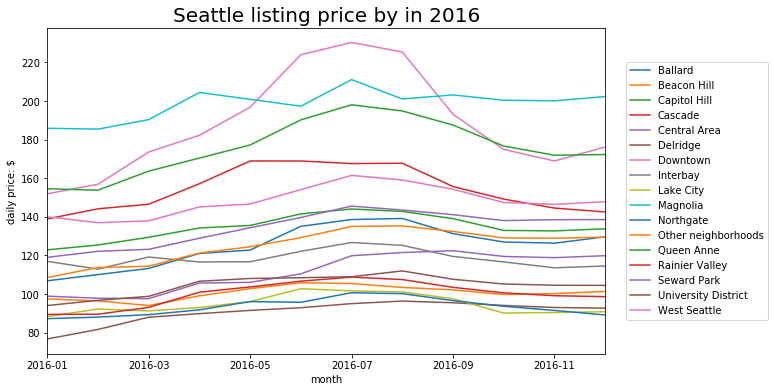

In [53]:
#plot the price agains month, labeled by neighbourhoods

calender_pivot.plot()
fig = plt.gcf()
fig.set_size_inches(10, 6,forward=True)
plt.legend(loc='right',bbox_to_anchor=(1.3,0.5))
plt.title('Seattle listing price by in 2016',size=20)
plt.ylabel('daily price: $');

# 2017-01 has only two days of data, thus may not be representive

### Conclusion:

**<font color='blue'>In most neighbourhoods price peaks in July, a few in August.</font> Especially in Downtown district price from June to August is much higher than other months in this area. Okay, you may cross those months in your trip planner now.**

[**Back to Top**](#p5)

### <a id='q4'>4.</a> What are the busiest times of the year to visit Seattle?

Using reviews data, estimate the number of nights visistor book each month in Seattle. Below are a few cells to process data in order to get the graph for demonstration.

In [60]:
#lets's get back to reviews data
reviews=pd.read_csv(reviews_path)
reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


In [61]:

# add month feature regardless of the year
reviews['month']=reviews.date.str.split('-').str.get(1)
reviews['year']=reviews.date.str.split('-').str.get(0)

                                                     
# add minimum_nights to estimate occupancy days, add neighbouthood for analysis
reviews=reviews.merge(listing[['id','minimum_nights','neighbourhood_group_cleansed']], \
                      left_on='listing_id',right_on='id')
                                                     
# checked duplicates is 0                                               
reviews.duplicated().sum() 
                                                     
reviews.head(1)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,month,year,id_y,minimum_nights,neighbourhood_group_cleansed
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,07,2015,7202016,2,Queen Anne


In [62]:
#group data to gather useful infomation
occupancy=reviews.groupby(['neighbourhood_group_cleansed','month']).\
    minimum_nights.sum().reset_index(name='nights_per_month')
occupancy.head(1)

,neighbourhood_group_cleansed,month,nights_per_month
0,Ballard,01,408


In [63]:
#pivot data for graph drawing
occupancy_pivot=occupancy.pivot(index='month', columns='neighbourhood_group_cleansed',values='nights_per_month')
occupancy_pivot.head(1)

neighbourhood_group_cleansed,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
month,,,,,,,,,,,,,,,,,
01,408.0,169.0,876.0,80.0,531.0,119.0,1076.0,3.0,45.0,32.0,90.0,1096.0,349.0,213.0,53.0,50.0,188.0


Date range of below data is between 2009-06-07 and 2016-01-03.


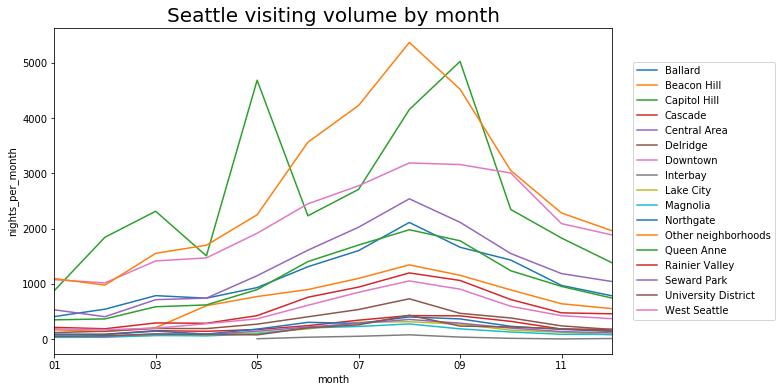

In [64]:
print('Date range of below data is between 2009-06-07 and 2016-01-03.')

#plotting
occupancy_pivot.plot()
fig = plt.gcf()
fig.set_size_inches(10, 6,forward=True)
plt.legend(loc='right',bbox_to_anchor=(1.3,0.5))
plt.title('Seattle visiting volume by month',size=20)
plt.ylabel('nights_per_month');

### Conclusion:
**Seen from below graph in the last cell, in most areas of Seattle, <font color='blue'>August_ is the most busiest time for visitors.</font> <br>
The odd one is _Capitol Hill_ , where May and September are the peak times. Any Seattle locals may tell what's so special over ther at these times.**

[**Back to Top**](#p5)